# Lab - working with online data 

In [ ]:
#YIFAT KADMON
#Data Analyst - Python
#Lecturer ELAD SHALEV

In this Lab , you will load , clean and store online flights data

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
import requests
import json

# Load the data

In [ ]:
# Download data flights  

In [3]:
r = requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=e83f763b-b7d7-479e-b172-ae981ddc6de5&limit=5000")

In [4]:
res = json.loads(r.content)

In [5]:
df = pd.DataFrame(res['result']['records'])

## display the first rows 

In [ ]:
#head - Bring the first 5 rows

In [ ]:
df.head()

### display the last 10 rows - What's wrong? 

In [ ]:
# Some of the lines are empty
#Meet the data
#We will use head, tail, columns, shape and info 

In [ ]:
#tail- bring the last rows
#we can see empty rows

In [ ]:
df.tail(10)

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.shape

# clean the data

In [ ]:
#In percentages some of the records are empty of all records.
#Count the number of blank fields, divide by the total number and get the percentages. 

In [ ]:
#Main loop that ran on all columns
#Sets a variable for the blank records
#An inner loop that ran on all the rows
#Check that the record by line tax and column is empty
#Place a sub if the record is empty
#Create a subname for the column
#Printing the end result and reducing the numbers after the dot

how many rows contains empty strings for each Column? (use a for loop to display the column name and percentage)

In [ ]:
len(df.columns)

In [ ]:
for i in range(len(df.columns)):
    count_empty_strings=0
    for f in range(len(df)):
        if df.iloc[f,i]=='':
            count_empty_strings = count_empty_strings+1
    column_name = df.columns[i]
    print ('column name is:',column_name, 'and the percentage of empty string are:',round(count_empty_strings*100/len(df),2),'%')


drop the empty rows  

In [ ]:
#A loop that ran on all the columns
#Deletes the rows that have an empty entry
#Note that columns will not be deleted
#drop(df.index,inplace=true)
#df=='' -The lines to be deleted
#df.index= df[df[df.columns[i]]==''].index

In [7]:
for i in range(len(df.columns)):
    df.drop(df[df[df.columns[i]]==''].index,inplace=True)

In [30]:
#Test result

In [ ]:
df.info()

format the current date with underscore separation (%d_%m_%y)

In [ ]:
#Take the date of the day and display it in the configuration of dd_mm_yyyy
#date.today 
#Changing the view of the date

In [ ]:
today=datetime.date.today()

In [53]:
print(today.day,'_',today.month,'_',today.year)

21 _ 4 _ 2022


Drop the _id column 

In [ ]:
#drop - id column
#df.drop(['column_name'],axis=1)

In [8]:
df.drop(columns='_id' , inplace=True) 

save the raw data (add the current date to the file name) 

In [ ]:
#save the DF as CSV . name folder- the date.

In [9]:
df.to_csv('21.4.2022.csv')

select the airline code and name without duplicates (CHOPER,CHOPERD)

In [ ]:
#df.name_column.unique() - found airline code and name without duplicates

In [ ]:
df.CHOPER.unique()

In [ ]:
df.CHOPERD.unique()

In [12]:
df = df.drop_duplicates(subset=['CHOPER', 'CHOPERD'])

Load the file airlines.csv and merge it with a new data and save the file 'airline.csv'

In [ ]:
#Upload airlines.csv as additional data. Merge and pour into a file with airlines.csv. 
#Upload the file, configure the relevant folder
#Use the os.chdir command to switch from folder to folder 
#df=pd.read_csv('filename.csv')
#merge 

In [13]:
import os

In [14]:
path='C:\\python\\DataSetes\\Python Project'
os.chdir(path)
df1=pd.read_csv('21.4.2022.csv')

In [ ]:
df1

In [16]:
path='C:\\python\\DataSetes\\Python Project'
os.chdir(path)
df2=pd.read_csv('airlines.csv')

In [ ]:
df2

In [17]:
df3 = pd.concat([df1,df2])

In [ ]:
df3

In [18]:
df3.to_csv('airlines.csv')

Drop the Airline name column 

In [ ]:
# drop Airline name column  
#drop columns 'CHOPERD'

In [19]:
df3.drop(columns='CHOPERD' , inplace=True) 

In [ ]:
df3

Do the same task with airports (CHLOC1,CHLOC1D) and save the file 'airports.csv'

In [ ]:
# Take (CHLOC1, CHLOC1D) and merge with airport.csv 
#Take the (CHLOC1, CHLOC1D) from the original DF, MERGE to the airport.csv file. 
#This way you will get uniqueness and not duplicity. Consolidate the DATASETS and save them.

In [20]:
df3 = df3.drop_duplicates(subset=['CHLOC1', 'CHLOC1D'])

In [ ]:
df3

In [21]:
path='C:\\python\\DataSetes\\Python Project'
os.chdir(path)
df4=pd.read_csv('airports.csv')

In [ ]:
df4

In [22]:
df5 = pd.concat([df3,df4])

In [ ]:
df5

In [23]:
df5.to_csv('airports.csv')

drop the hebrew columns 'CHLOC1TH','CHLOC1CH','CHRMINH'

In [ ]:
#Delete these fields
#df.drop(columns='' , inplace=True) 

In [24]:
df5.drop(columns='CHLOC1TH' , inplace=True) 
df5.drop(columns='CHLOC1CH' , inplace=True) 
df5.drop(columns='CHRMINH' , inplace=True) 

### rename the columns 

In [ ]:
df5

In [ ]:
#Check the column names in the latest data.
#There are more columns than needed, delete the unnecessary columns 

In [25]:
df5.drop(columns='Unnamed: 0.2' , inplace=True) 
df5.drop(columns='Unnamed: 0.1' , inplace=True) 
df5.drop(columns='Unnamed: 0' , inplace=True) 
df5.drop(columns='_id' , inplace=True)
df5.drop(columns='CHCINT' , inplace=True)
df5.drop(columns='CHCKZN' , inplace=True)

In [33]:
df5.drop(columns='CHLOC1D' , inplace=True)

In [ ]:
df5.columns

In [35]:
df6=df5.rename(columns={'CHOPER':'Airline', 'CHFLTN':'FlightNum', 'CHSTOL':'PlanTime' , 'CHPTOL':'ActualTime', 'CHAORD':'Direction', 'CHLOC1':'Airport', 'CHLOC1T':'city', 'CHLOCCT':'Country', 'CHTERM':'Terminal','CHRMINE':'status'},errors="raise, axis=1")

In [ ]:
df6

Change the PlanTime and ActualTime columns type to np.datetime64

In [ ]:
#Change the type of these two columns to datetime
#check what is the d-type of each column
#change d-type df.date = pd.to_datetime(df.date)

In [37]:
df6['PlanTime'] = pd.to_datetime(df6['PlanTime'])
df6['ActualTime'] = pd.to_datetime(df6['ActualTime'])

Save the clean data 

In [ ]:
#Produce a file called clean data instead of the existing cleandata.csv.

In [38]:
df6.to_csv('cleandata.csv')

In [ ]:
df6

update the file final.csv with departed, landed and canceled flights only

In [ ]:
#Produce df called finel
#Take there only the columns that have flight status: departed, landed and canceled flights
#query
#Add to finel.csv 

In [41]:
df7=df6.query("status in ('DEPARTED','LANDED','CANCELED')")

In [ ]:
df7

In [42]:
df7.to_csv('final.csv')

Add a new column for total delay in minutes

In [ ]:
#Add a field that defines how long the delay is. Between actual time and play time
# If there is a difference between them then there is a delay. No minus.
#Produce a new df
#Clean it

In [44]:
path='C:\\python\\DataSetes\\Python Project'
os.chdir(path)
df8=pd.read_csv('final.csv')

In [46]:
df9 = pd.concat([df7,df8])

In [ ]:
df9.info()

In [ ]:
df9.drop(columns='Unnamed: 0.3' , inplace=True) 
df9.drop(columns='Unnamed: 0' , inplace=True) 

In [55]:
df9['PlanTime'] = pd.to_datetime(df9['PlanTime'])
df9['ActualTime'] = pd.to_datetime(df9['ActualTime'])

In [ ]:
#list : ('PlanTime' - 'ActualTime')
#delay_min : df9['PlanTime']- df9['ActualTime']
#minutes - add dt.seconds//60

In [63]:
df9['delay_min'] = (df9['ActualTime']- df9['PlanTime']).dt.seconds//60

In [ ]:
df9

What is the average delay for departed flights

In [ ]:
#df.mean()

In [ ]:
df9["delay_min"].mean()

Display total delay distribution 

In [ ]:
#Graph showing the time delay with displot.
#We will look for which graphs can show trends

In [ ]:
df9.columns

<Figure size 864x532.8 with 0 Axes>

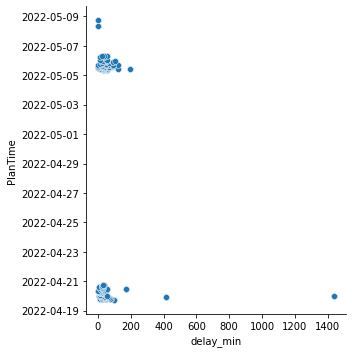

<Figure size 864x532.8 with 0 Axes>

In [86]:
sns.relplot(x='delay_min', y='PlanTime', data=df9)
plt.figure(figsize=(12,7.4))
#Between the date ranges of 19-21.4, and between 5-7.5 there is a longer delay.

In [93]:
sns.relplot(x='delay_min', y='Airport', data=df9)
#There are specific airports where there are more delays than others. We will try to isolate them

In [94]:
df10=df9.query("delay_min >= 100")

In [ ]:
df10

In [96]:
sns.relplot(x='delay_min', y='Airport', data=df10)
#It can be seen that in 7 airports out of all airports there are delays that are recommended to explore and check